In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps
from numpy import trapz
from sklearn.metrics import auc
%matplotlib inline

## Procedure

1. (a) Take empty sphere measurement.
2. (b) Take measurement with laser light hitting sphere wall, then hitting sample
    - A fraction $\mu$ is absorbed by the sample
    - A fraction $1 - \mu$ is not absorbed by the sample, and is collected.
3. (c) Take measurement with laser light directly hitting sample
    - A fraction $A$ is absorbed by the sample
    - A fraction $(1-A)$ is transmitted or reflected through the sample
    - A fraction $\mu$ of $(1-A)$ is reabsorbed by the sample.
    
    
From paper deMello et al (1997),

$$ \eta = \frac{P_c - (1-A)P_b}{L_a A} $$

where

- $\eta$ = efficiency
- $P_a, P_b, P_c$ = area under emission profile for experiments (a) (b) and (c) (proportional to amount of emitted light)
- $L_a, L_b, L_c$ = area under the laser profile (proportional to unabsorbed light?)
- $A = (1-\frac{L_c}{L_b})$

### The code that follows is for data taken with the OceanView spectrometer in the following format:

#### A CSV with four columns:
1. Wavelength data
2. Laser on sample
3. Laser off sample
4. No sample

#### The code below splits up the data, finds the areas below each, finds the PLQE, and plots the data.

In [3]:
# Loading data taken with OceanView spectrometer 
PLdata=np.loadtxt('PLQE rhodamine.csv', delimiter = ',', skiprows = 1)

wavelength=PLdata[:,0]
c=PLdata[:,1]
b=PLdata[:,2]
a=PLdata[:,3]

(200, 1000)

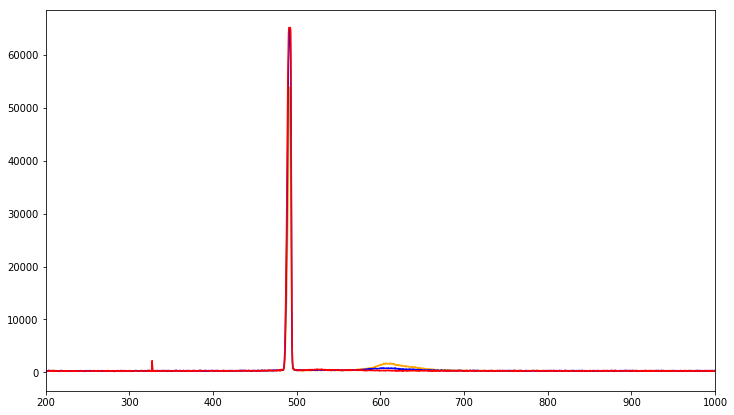

In [4]:
# preliminary plot
plt.figure(figsize = (12,7))
plt.plot(wavelength, c, color = 'orange', label = 'C: laser on sample')
plt.plot(wavelength, b, color = 'blue', label = 'B: laser off sample')
plt.plot(wavelength, a, color = 'red', label = 'A: empty sphere')
plt.xlim(200,1000)

### This may need to be changed depending on the sample.

From this preliminary run, it seems clear that the laser wavelengths are all between 450 and 550 nm, and the PL is all within 550 and 700 nm. 

In [5]:
bkgd_a = np.average(a[150:250])
bkgd_b = np.average(b[150:250])
bkgd_c = np.average(c[150:250])

aNoBkgd = a - bkgd_a
bNoBkgd = b - bkgd_b
cNoBkgd = c - bkgd_c

In [6]:
wavelength[250]

303.02199999999999

In [13]:
#save the wavelength arrays to be used for calculations for the laser area and the PL area
wavelength_L_crop = []
# save an array of the indices used, so that we can make a corresponding y array for L and PL
L_activeInd = []
wavelength_P_crop = []
P_activeInd = []

for i in range(len(wavelength)):
    if wavelength[i] >= 450 and wavelength[i] <550:
        wavelength_L_crop.append(wavelength[i])
        L_activeInd.append(i)
    if wavelength[i] >= 550 and wavelength[i] <700:
        wavelength_P_crop.append(wavelength[i])
        P_activeInd.append(i)

In [14]:
# bookkeeping: clean up the data arrays to be only over the ranges we want
L_start=L_activeInd[0]
L_end = L_activeInd[-1]

La_crop = aNoBkgd[L_start:L_end+1]
Lb_crop = bNoBkgd[L_start:L_end+1]
Lc_crop = cNoBkgd[L_start:L_end+1]

P_start = P_activeInd[0]
P_end = P_activeInd[-1]

Pa_crop = aNoBkgd[P_start:P_end+1]
Pb_crop = bNoBkgd[P_start:P_end+1]
Pc_crop = cNoBkgd[P_start:P_end+1]

In [15]:
# find the areas
La_area = auc(wavelength_L_crop, La_crop)
Lb_area = auc(wavelength_L_crop, Lb_crop)
Lc_area = auc(wavelength_L_crop, Lc_crop)

Pb_area = auc(wavelength_P_crop, Pb_crop)
Pc_area = auc(wavelength_P_crop, Pc_crop)

# A = immediate sample absorption fraction 
A = 1-(Lc_area/Lb_area)

eff = (Pc_area - (1-A)*Pb_area) / (La_area * A)

print(eff)

0.448410296463


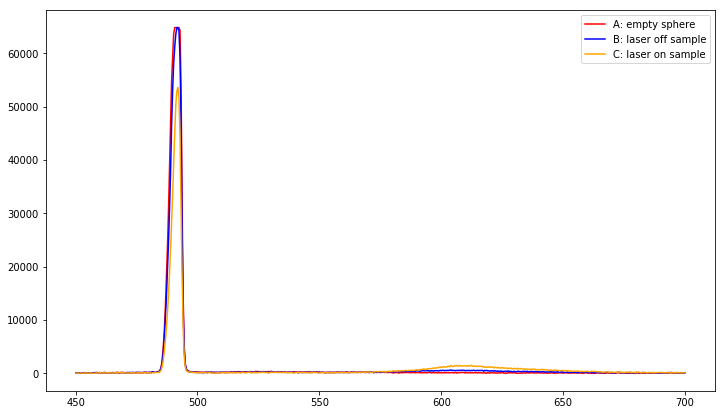

In [16]:
plt.figure(figsize = (12,7))
plt.plot(wavelength_L_crop, La_crop, color = 'red', label = 'A: empty sphere')
plt.plot(wavelength_L_crop, Lb_crop, color = 'blue', label = 'B: laser off sample')
plt.plot(wavelength_L_crop, Lc_crop, color = 'orange', label = 'C: laser on sample')
plt.plot(wavelength_P_crop, Pa_crop, color = 'red')
plt.plot(wavelength_P_crop, Pb_crop, color = 'blue')
plt.plot(wavelength_P_crop, Pc_crop, color = 'orange')
plt.legend()
plt.savefig('PLQE.png')

### Next steps:

- PL for perovskite films is really low, need to take measurements with a longer integrating time. Integrating time goes linearly with intensity: should be 
- try a DMSO/DMF film - nmp films are weird
